 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [389]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [390]:
# Reading whale returns
whale_returns = Path('../Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [391]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON AND CO INC             1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [392]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [393]:
# Reading algorithmic returns
algo_returns = Path('../Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [394]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [395]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [396]:
# Reading S&P 500 Closing Prices
sp500_history = Path('../Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_history, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [397]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [398]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close']
sp500_df.dtypes

/Users/mrose/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [399]:
# Calculate Daily Returns
daily_returns_sp500_df = sp500_df.pct_change()
daily_returns_sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [400]:
# Drop nulls
daily_returns_sp500_df.dropna(inplace=True)
daily_returns_sp500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [401]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500_df = daily_returns_sp500_df.rename(columns={
    'Close': 'S&P 500 Daily Returns'
})

daily_returns_sp500_df.head()

,S&P 500 Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [402]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_df, algo_df, daily_returns_sp500_df], axis='columns', join='inner')
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

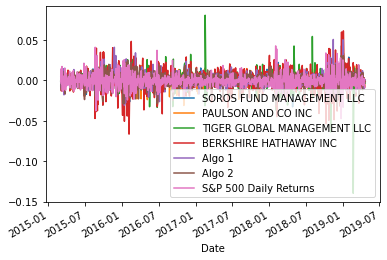

In [403]:
# Plot daily returns of all portfolios
joined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

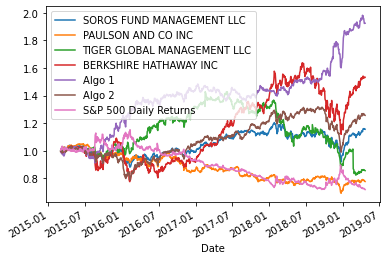

In [404]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

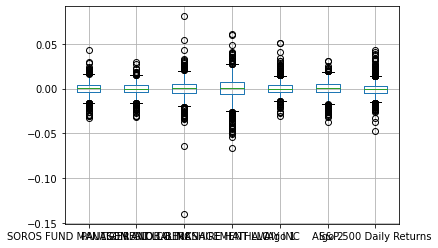

In [405]:
# Box plot to visually show risk
joined_df.boxplot()

### Calculate Standard Deviations

In [406]:
# Calculate the daily standard deviations of all portfolios
joined_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON AND CO INC             0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Daily Returns          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [407]:
# Calculate the daily standard deviation of S&P 500
sp500_std = joined_df['S&P 500 Daily Returns'].std()
sp500_std

# Determine which portfolios are riskier than the S&P 500
joined_df.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON AND CO INC             False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500 Daily Returns          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [408]:
# Calculate the annualized standard deviation (252 trading days)
annual_sd = joined_df.rolling(window=252).std()
annual_sd.dropna(inplace=True)
annual_sd

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2016-03-01,0.008894,0.006472,0.009570,0.015030,0.009682,0.009962,0.010641
2016-03-02,0.008900,0.006467,0.009570,0.015025,0.009680,0.009988,0.010641
2016-03-03,0.008899,0.006466,0.009569,0.015025,0.009665,0.009998,0.010643
2016-03-04,0.008899,0.006464,0.009568,0.015086,0.009669,0.010007,0.010605
2016-03-07,0.008893,0.006484,0.009562,0.015088,0.009666,0.010025,0.010625
...,...,...,...,...,...,...,...
2019-04-15,0.009406,0.007337,0.014707,0.015248,0.008196,0.008608,0.009487
2019-04-16,0.009383,0.007333,0.014700,0.015245,0.008211,0.008598,0.009466
2019-04-17,0.009375,0.007339,0.014696,0.015200,0.008240,0.008592,0.009466


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

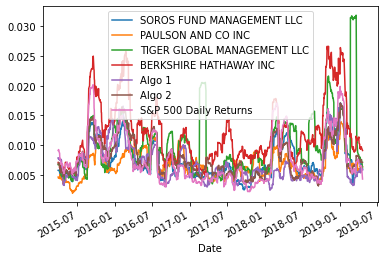

In [409]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
twoone_sd = joined_df.rolling(window=21).std()
twoone_sd.dropna(inplace=True)
twoone_sd

# Plot the rolling standard deviation
twoone_sd.plot()

### Calculate and plot the correlation

<AxesSubplot:>

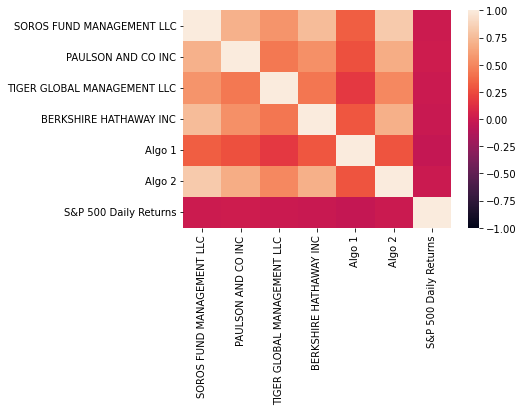

In [410]:
# Calculate the correlation
correlation = joined_df.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

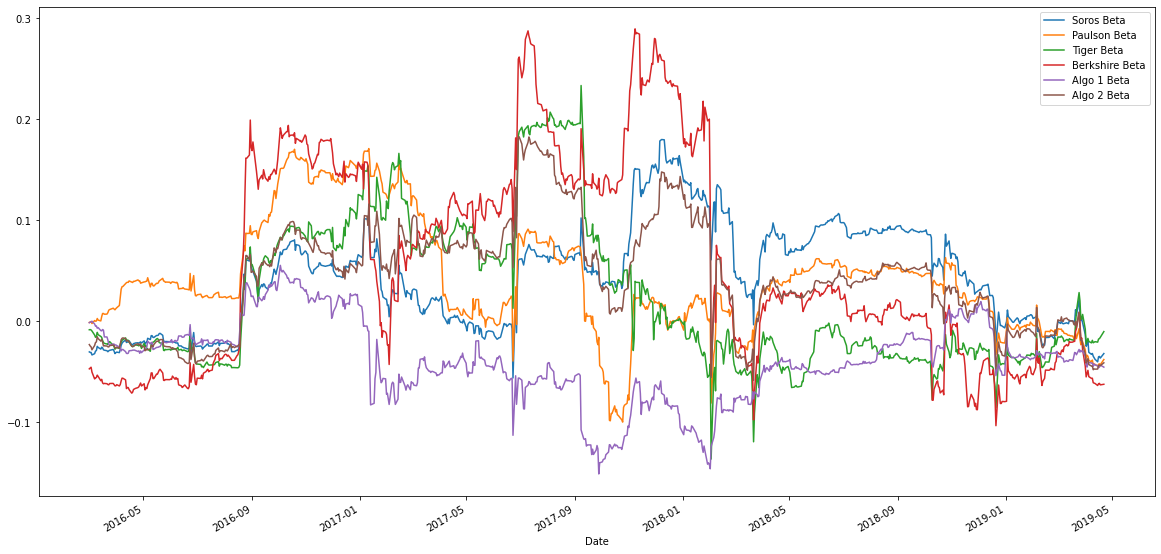

In [418]:
# Calculate covariance of a single portfolio
soros_covariance = joined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=252).cov(joined_df['S&P 500 Daily Returns'])

# Calculate variance of S&P 500
variance = joined_df['S&P 500 Daily Returns'].rolling(window=252).var()

# Computing covariances
soros_covariance = joined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=252).cov(joined_df['S&P 500 Daily Returns'])
paul_covariance = joined_df['PAULSON AND CO INC'].rolling(window=252).cov(joined_df['S&P 500 Daily Returns'])
tiger_covariance = joined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=252).cov(joined_df['S&P 500 Daily Returns'])
berk_covariance = joined_df['BERKSHIRE HATHAWAY INC'].rolling(window=252).cov(joined_df['S&P 500 Daily Returns'])
algo1_covariance = joined_df['Algo 1'].rolling(window=252).cov(joined_df['S&P 500 Daily Returns'])
algo2_covariance = joined_df['Algo 2'].rolling(window=252).cov(joined_df['S&P 500 Daily Returns'])

# Computing betas
soros_beta = soros_covariance / variance
paul_beta = paul_covariance / variance
tiger_beta = tiger_covariance / variance
berk_beta = berk_covariance / variance
algo1_beta = algo1_covariance / variance
algo2_beta = algo2_covariance / variance

# Plot beta trend
ax = soros_beta.plot(figsize=(20,10))
paul_beta.plot(ax=ax)
tiger_beta.plot(ax=ax)
berk_beta.plot(ax=ax)
algo1_beta.plot(ax=ax)
algo2_beta.plot(ax=ax)

#Legend
ax.legend(['Soros Beta', 
           'Paulson Beta', 
           'Tiger Beta', 
           'Berkshire Beta', 
           'Algo 1 Beta',
           'Algo 2 Beta'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


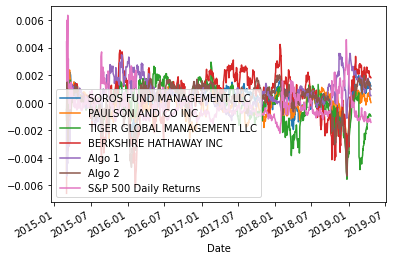

In [413]:
# Use `ewm` to calculate the rolling window
twoone_ewm_sd = joined_df.ewm(halflife=21).mean()
twoone_ewm_sd.dropna(inplace=True)
twoone_ewm_sd.plot()
twoone_ewm_sd

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [414]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON AND CO INC            -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Daily Returns         -0.518582
dtype: float64

<AxesSubplot:>

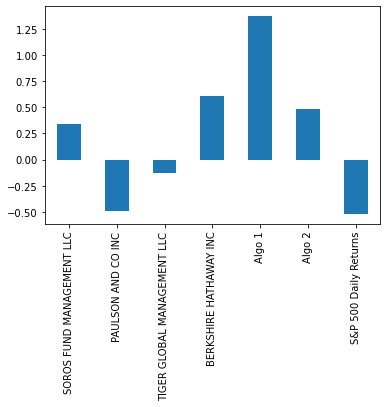

In [372]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic strategies outperform both the market and whale portfolios, as exemplified by Algo 1's top performance in cumulative returns and Algo 2 placing third right behind Berkshire Hathaway. Furthermore, Algo 1 has, by far, the highest Sharpe Ratio, meaning it returns the best reward for risk taken (Algo 1 has a Sharpe Ratio of 1.37 while Berkshire Hathaway, in second place, had 0.61).

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [373]:
# Reading data from 1st stock
nvda = Path('../Resources/nvda.csv')
nvda_df = pd.read_csv(nvda, index_col='Date', infer_datetime_format=True, parse_dates=True)
nvda_df.head()

,NVDA Closing Price
Date,
2015-03-03,5.55
2015-03-04,5.61
2015-03-05,5.72
2015-03-06,5.64
2015-03-09,5.65


In [374]:
# Reading data from 2nd stock
csco = Path('../Resources/csco.csv')
csco_df = pd.read_csv(csco, index_col='Date', infer_datetime_format=True, parse_dates=True)
csco_df.head()

,CSCO Closing Price
Date,
2015-03-03,29.54
2015-03-04,29.33
2015-03-05,29.30
2015-03-06,28.93
2015-03-09,29.36


In [375]:
# Reading data from 3rd stock
cost = Path('../Resources/cost.csv')
cost_df = pd.read_csv(cost, index_col='Date', infer_datetime_format=True, parse_dates=True)
cost_df.head()

,COST Closing Prices
Date,
2015-03-03,147.37
2015-03-04,147.17
2015-03-05,151.17
2015-03-06,149.54
2015-03-09,150.68


In [376]:
# Combine all stocks in a single DataFrame
my_joined_df = pd.concat([nvda_df, csco_df, cost_df], axis='columns', join='inner')

my_joined_df.head()

,NVDA Closing Price,CSCO Closing Price,COST Closing Prices
Date,,,
2015-03-03,5.55,29.54,147.37
2015-03-04,5.61,29.33,147.17
2015-03-05,5.72,29.30,151.17
2015-03-06,5.64,28.93,149.54
2015-03-09,5.65,29.36,150.68


In [377]:
# Reset Date index
my_joined_df.reset_index

<bound method DataFrame.reset_index of             NVDA Closing Price  CSCO Closing Price  COST Closing Prices
Date                                                                   
2015-03-03                5.55               29.54               147.37
2015-03-04                5.61               29.33               147.17
2015-03-05                5.72               29.30               151.17
2015-03-06                5.64               28.93               149.54
2015-03-09                5.65               29.36               150.68
...                        ...                 ...                  ...
2019-04-24               47.79               56.88               247.96
2019-04-25               46.73               56.33               245.60
2019-04-26               44.52               55.88               243.82
2019-04-29               44.83               56.13               244.28
2019-04-30               45.25               55.95               245.53

[1048 rows x 3 columns]>

In [378]:
# Reorganize portfolio data by having a column per symbol
my_joined_df = my_joined_df.rename(columns={
    'NVDA Closing Price': 'NVDA'
})

my_joined_df = my_joined_df.rename(columns={
    'CSCO Closing Price': 'CSCO'
})

my_joined_df = my_joined_df.rename(columns={
    'COST Closing Prices': 'COST'
})

my_joined_df.head()

,NVDA,CSCO,COST
Date,,,
2015-03-03,5.55,29.54,147.37
2015-03-04,5.61,29.33,147.17
2015-03-05,5.72,29.30,151.17
2015-03-06,5.64,28.93,149.54
2015-03-09,5.65,29.36,150.68


In [379]:
# Calculate daily returns
my_daily_returns = my_joined_df.pct_change()

# Drop NAs
my_daily_returns.dropna(inplace=True)

# Display sample data
my_daily_returns

,NVDA,CSCO,COST
Date,,,
2015-03-04,0.010811,-0.007109,-0.001357
2015-03-05,0.019608,-0.001023,0.027179
2015-03-06,-0.013986,-0.012628,-0.010783
2015-03-09,0.001773,0.014863,0.007623
2015-03-10,0.017699,-0.023842,-0.016724
...,...,...,...
2019-04-24,0.002517,0.003352,0.009691
2019-04-25,-0.022180,-0.009669,-0.009518
2019-04-26,-0.047293,-0.007989,-0.007248


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

,NVDA,CSCO,COST
Date,,,
2015-03-04,1.010811,0.992891,0.998643
2015-03-05,1.030631,0.991875,1.025785
2015-03-06,1.016216,0.979350,1.014725
2015-03-09,1.018018,0.993907,1.022460
2015-03-10,1.036036,0.970210,1.005361
...,...,...,...
2019-04-24,8.610811,1.925525,1.682568
2019-04-25,8.419820,1.906906,1.666554
2019-04-26,8.021622,1.891672,1.654475


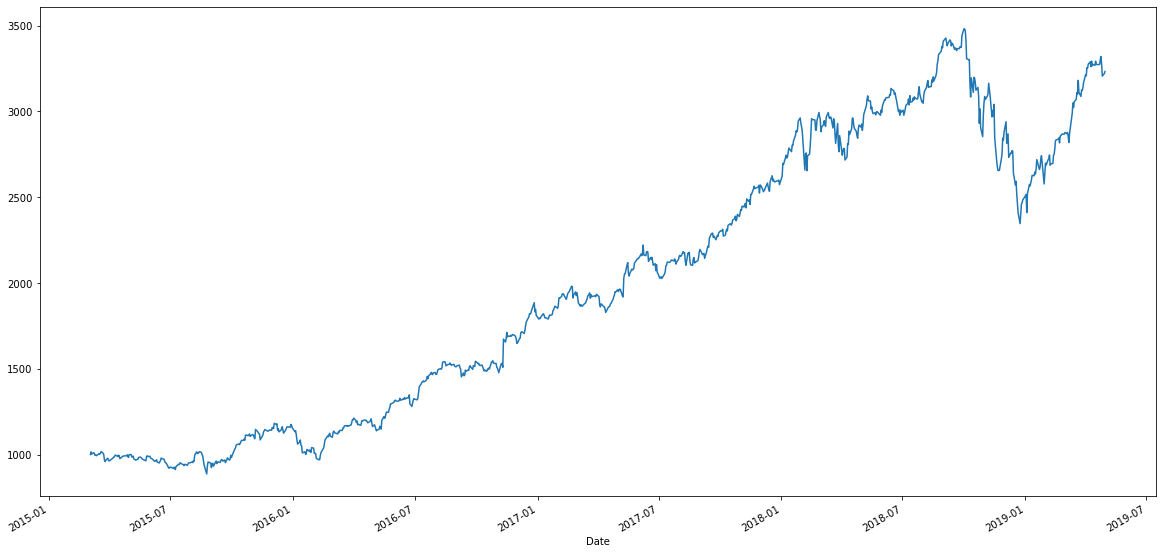

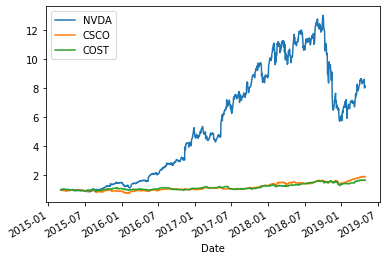

In [380]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
initial_investment = 1000
my_portfolio_returns = my_daily_returns.dot(weights)
my_cumulative_returns = (1 + my_portfolio_returns).cumprod()
my_cumulative_profits = (initial_investment * my_cumulative_returns)
my_cumulative_profits.plot(figsize=(20,10))

# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + my_daily_returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot()

# Display sample data
cumulative_returns

In [381]:
# Join your returns DataFrame to the original returns DataFrame
joined_returns_df = pd.concat([joined_df, portfolio_returns], axis='columns', join='inner')
joined_returns_df.columns.values[7] = 'My Portfolio Returns'
joined_returns_df

# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_returns_df.dropna(inplace=True)
joined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,My Portfolio Returns
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000782
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.015255
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.012466
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.008087
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.007622
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.001630
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.007239
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.005077


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [382]:
# Calculate the annualized `std`
my_annual_sd = joined_returns_df.rolling(window=252).std()
my_annual_sd.dropna(inplace=True)
my_annual_sd

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,My Portfolio Returns
Date,,,,,,,,
2016-03-02,0.008900,0.006467,0.009570,0.015025,0.009680,0.009988,0.010641,0.013435
2016-03-03,0.008899,0.006466,0.009569,0.015025,0.009665,0.009998,0.010643,0.013442
2016-03-04,0.008899,0.006464,0.009568,0.015086,0.009669,0.010007,0.010605,0.013412
2016-03-07,0.008893,0.006484,0.009562,0.015088,0.009666,0.010025,0.010625,0.013390
2016-03-08,0.008960,0.006514,0.009565,0.015089,0.009878,0.010123,0.010576,0.013382
...,...,...,...,...,...,...,...,...
2019-04-15,0.009406,0.007337,0.014707,0.015248,0.008196,0.008608,0.009487,0.015996
2019-04-16,0.009383,0.007333,0.014700,0.015245,0.008211,0.008598,0.009466,0.015984
2019-04-17,0.009375,0.007339,0.014696,0.015200,0.008240,0.008592,0.009466,0.015935


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

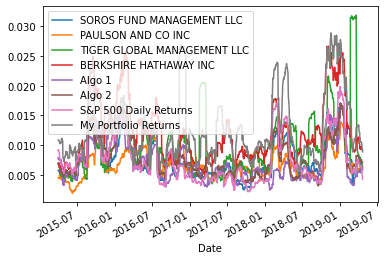

In [383]:
# Calculate rolling standard deviation
my_rolling_sd = joined_returns_df.rolling(window=21).std()
my_rolling_sd.dropna(inplace=True)
my_rolling_sd

# Plot rolling standard deviation
my_rolling_sd.plot()

### Calculate and plot the correlation

<AxesSubplot:>

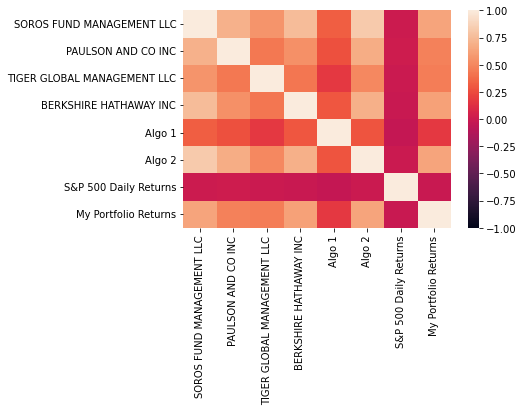

In [384]:
# Calculate and plot the correlation
my_correlation = joined_returns_df.corr()
sns.heatmap(my_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio Returns'}, xlabel='Date'>

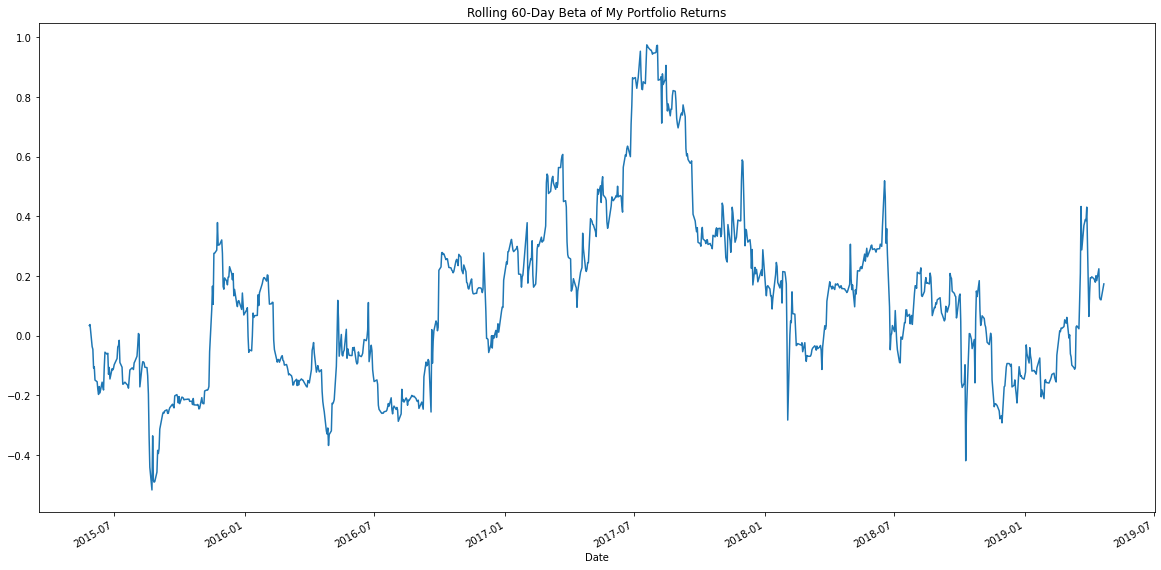

In [385]:
# Calculate and plot Beta
my_covariance = joined_returns_df['My Portfolio Returns'].rolling(window=60).cov(joined_returns_df['S&P 500 Daily Returns'])
my_variance = joined_returns_df['S&P 500 Daily Returns'].rolling(window=60).var()
my_beta = my_covariance / my_variance
my_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [386]:
# Calculate Annualized Sharpe Ratios
my_sharpe_ratios = (joined_returns_df.mean() * 252) / (joined_returns_df.std() * np.sqrt(252))
my_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.345506
PAULSON AND CO INC            -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
S&P 500 Daily Returns         -0.526730
My Portfolio Returns           1.426352
dtype: float64

<AxesSubplot:>

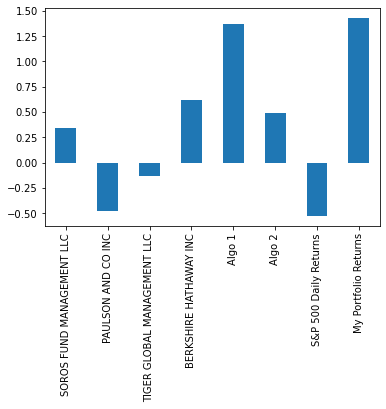

In [387]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [388]:
#My portfolio performed very well against the algo, whale, and S&P 500 returns. My portfolio had the highest Sharpe ratio out of all portflios and was carried by Nvdia. 